In [1]:
#pip install opencv-python

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import cv2
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [53]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [54]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [55]:
data_dir

'.\\datasets\\flower_photos'

In [56]:
import pathlib
data_dir=pathlib.Path(data_dir)

In [57]:
data_dir

WindowsPath('datasets/flower_photos')

In [58]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [59]:
roses=list(data_dir.glob( 'roses/*' ))

In [60]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [61]:
tulips=list(data_dir.glob('tulips/*'))


In [62]:
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

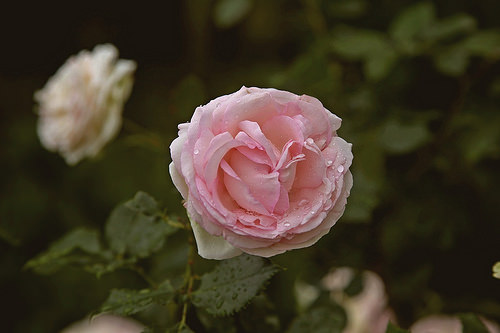

In [63]:
PIL.Image.open(str(roses[100]))

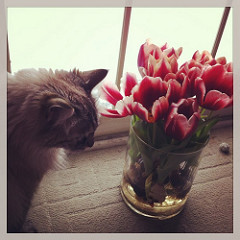

In [64]:
PIL.Image.open(str(tulips[700]))

In [65]:
flowers_image_dict={
    'roses': list(data_dir.glob( 'roses/*' )) ,
    'tulips': list(data_dir.glob('tulips/*')),
    'dandelions': list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*')),
}

In [66]:
flowers_image_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [67]:
flowers_labels_dict={
    'roses':0 ,
    'tulips':1 ,
    'dandelions':2 ,
    'sunflowers':3,
    'daisy':4,
}

In [68]:
IMAGE_SHAPE=(224,224)

In [69]:
img= cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape
#imread --> gives numpy array for the image

(240, 179, 3)

In [70]:
flowers_image_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [71]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [72]:
flowers_image_dict

{'roses': [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
  WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
  WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
  WindowsPath('

In [73]:
X,y=[],[]
for flower_name,images in flowers_image_dict.items():
        for image in images:
            img=cv2.imread(str(image))
            resized_img=cv2.resize(img,IMAGE_SHAPE)
            X.append(resized_img)
            y.append(flowers_labels_dict[flower_name])
        
        
        
        


In [74]:
X=np.array(X)

In [75]:
y=np.array(y)

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=0)

In [77]:
len(X_train)

2752

In [78]:
X_train_scaled=X_train /255
X_test_scaled=X_test/255

In [79]:
X_train_scaled[2751]

array([[[0.48235294, 0.42745098, 0.43529412],
        [0.46666667, 0.41568627, 0.42352941],
        [0.48627451, 0.43529412, 0.44313725],
        ...,
        [0.20392157, 0.17647059, 0.21176471],
        [0.23921569, 0.23137255, 0.27843137],
        [0.28627451, 0.27843137, 0.32941176]],

       [[0.4627451 , 0.41568627, 0.42352941],
        [0.45490196, 0.40784314, 0.41568627],
        [0.4745098 , 0.41960784, 0.42745098],
        ...,
        [0.09411765, 0.09411765, 0.11372549],
        [0.12156863, 0.12156863, 0.14901961],
        [0.14509804, 0.14901961, 0.18039216]],

       [[0.46666667, 0.41568627, 0.42352941],
        [0.45882353, 0.40784314, 0.41568627],
        [0.46666667, 0.41568627, 0.42352941],
        ...,
        [0.02352941, 0.02745098, 0.03921569],
        [0.05490196, 0.05490196, 0.08627451],
        [0.07058824, 0.07058824, 0.10196078]],

       ...,

       [[0.2745098 , 0.25490196, 0.26666667],
        [0.27843137, 0.25490196, 0.27058824],
        [0.2745098 , 0

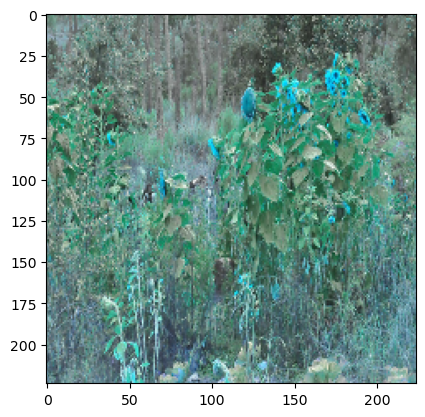

In [80]:
plt.imshow(X[2900])

In [81]:
classifier=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [87]:
image_labels=[]
with open ("ImageNetLabels.txt","r") as f:
    image_labels=f.read().splitlines()

In [90]:
predict=classifier.predict(np.array([X[0],X[1],X[2]]))
np.argmax(predict,axis=1)
image_labels[880]

1/1 [==============================] - 0s 24ms/step


'umbrella'

In [28]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [29]:
model.fit(X_train_scaled,Y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 19ms/step - loss: 1.4066 - accuracy: 0.4015
Epoch 2/30
86/86 [==============================] - 2s 18ms/step - loss: 1.0680 - accuracy: 0.5618
Epoch 3/30
86/86 [==============================] - 2s 18ms/step - loss: 0.9122 - accuracy: 0.6479
Epoch 4/30
86/86 [==============================] - 2s 18ms/step - loss: 0.7414 - accuracy: 0.7198
Epoch 5/30
86/86 [==============================] - 2s 18ms/step - loss: 0.5542 - accuracy: 0.7976
Epoch 6/30
86/86 [==============================] - 2s 19ms/step - loss: 0.3691 - accuracy: 0.8710
Epoch 7/30
86/86 [==============================] - 2s 19ms/step - loss: 0.2056 - accuracy: 0.9368
Epoch 8/30
86/86 [==============================] - 2s 18ms/step - loss: 0.1229 - accuracy: 0.9662
Epoch 9/30
73/86 [========================>.....] - ETA: 0s - loss: 0.0698 - accuracy: 0.9842

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_scaled,Y_test)

In [ ]:
predictions=model.predict(X_test_scaled)

In [ ]:
score=tf.nn.softmax(predictions[2])
score

In [ ]:
np.argmax(score)

In [ ]:
Y_test[2]

In [ ]:
#data_augmentation=keras.Sequential([
    #layers.experimental.preprocessing.(0.9),
#])

data_augmentation = tf.keras.Sequential()
data_augmentation.add(tf.keras.layers.RandomZoom(0.2))

In [ ]:
classes=[ 'roses','tulips' ,'dandelions' ,'sunflowers','daisy']

In [ ]:
plt.imshow(X[0])
plt.xlabel(classes[0])

In [ ]:
data_augmentation(X)[0]